#### Overall goal:
Reduce the costs of signup incentives by customizing them for specific user groups.

#### Tasks:
1) Gain insight into the different types of users and how they use the company products.

2) Make suggestions about which customers should receive which types of benefits.

#### Data:
Data contains aggregate information from the previous 12 months for existing customers. The VP would like data from the last 6 months to be used. From the column descriptions it seems that there are 2 types of products/services being offered or tracked by this company: credit card purchases and cash advances. Credit card purchases are divided into one-off purchases and installment purchases.

Note: data from column names with the word FREQUENCY in them are ratios over the last 12 months.

#### Initial strategy:
First, examine the data and get an overall idea of what each column represents, the ranges of their values, and data cleanliness. Then look at variations in the ways the products are used by different customers. If appropriate, use some sort of clustering to segment the customers. Finally, make suggestions based on the insights gained.

### 1. Import data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data
ccinfo = pd.read_csv('cc_info.csv')

### 2. Preliminary inspection of the data

In [3]:
# take a look
ccinfo

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# check for duplicates
print(ccinfo.duplicated().sum())
print(ccinfo.CUST_ID.duplicated().sum())

0
0


No duplicate rows and no duplicate IDs.

In [5]:
# check data types
ccinfo.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

All columns are numbers except CUST_ID.

In [6]:
# get number of nulls in each column
ccinfo.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Three and half percent of entries are missing a value for MINIMUM_PAYMENT, and one row is missing a value for CREDIT_LIMIT.

### 3. Exploratory data analysis

In [7]:
# get summary stats
ccinfo.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
print(ccinfo.PURCHASES.sum())
print(ccinfo.ONEOFF_PURCHASES.sum())
print(ccinfo.INSTALLMENTS_PURCHASES.sum())
print(ccinfo.CASH_ADVANCE.sum())

8978683.26
5302314.470000001
3679055.42
8760896.456566


**Some general observations on the averaged data**

- Overall, users spend about \\$1000 in purchases over 6 months spread throughout the year, and about \\$1000 in cash advances over 1-2 months spread throughout the year. The average purchase amount is \\$15 and the average cash advance amount is \\$3. Users generally spend less on installment purchases than on one-off purchases, but they make installment purchases more frequently.


- On average each user has a monthly balance of \\$1564 for most months of the year. Users generally make payments that are double their minimum payment, but only pay their balance in full about twice a year. 


- Most users have been with the company for at least a year.


- In total over the last year \\$8.97M was spent on purchases (\\$5.3M on one-off purchases and \\$3.67M on installment purchases) and \\$8.76M was spent on cash advances.

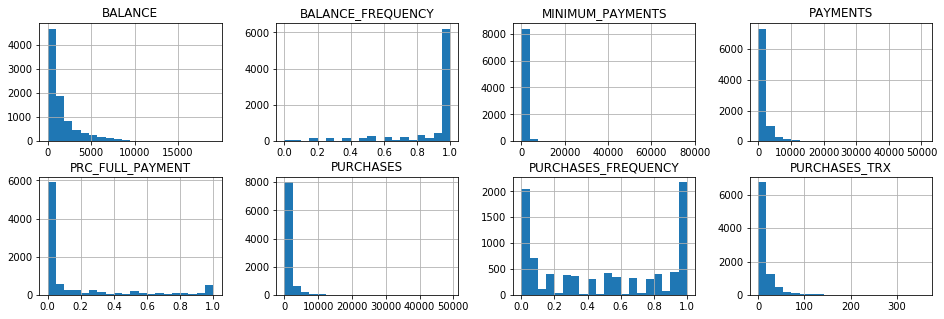

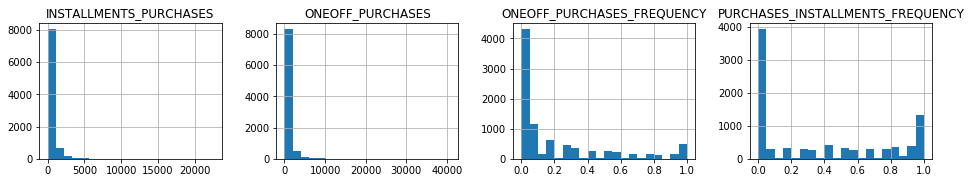

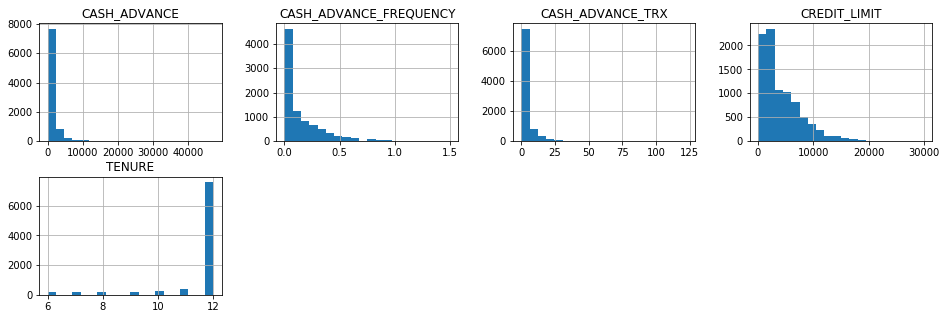

In [9]:
# visualize data distributions (rougly grouped by category to make it easier to look at)

# related to balance and payments
cols = ['BALANCE', 'BALANCE_FREQUENCY', 
        'PAYMENTS', 'PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS',
        'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX']
ccinfo.hist(column=cols, bins=20, layout=(2,4), figsize=(16,5));

# related to purchases
cols = ['ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 
        'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']
ccinfo.hist(column=cols, bins=20, layout=(1,4), figsize=(16,2.5));

# related to cash advances
cols = ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
        'CREDIT_LIMIT', 'TENURE']
ccinfo.hist(column=cols, bins=20, layout=(2,4), figsize=(16,5));

**Additional observations**

- About 20-25% of customers have not made a purchase in the last 12 months (see PURCHASES_FREQUENCY).


- A few of the columns appear to have outliers.

#### 3.1 Check if there are customers in the database that have not used any of the services

In [10]:
# make a boolean dataframe to count users by product type used

prods = ccinfo[['PURCHASES', 'ONEOFF_PURCHASES', 
                'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']]
prods = prods > 0
prods.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,True,False,True,False
1,False,False,False,True
2,True,True,False,False
3,True,True,False,True
4,True,True,False,False


In [11]:
# get size of group for each combination of products used
prods.groupby(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']).size()

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE
False      False             False                   False              1
                                                     True            2041
                             True                    True               2
True       False             True                    False           1799
                                                     True             459
           True              False                   False           1071
                                                     True             803
                             True                    False           1757
                                                     True            1017
dtype: int64

Looks like there is only one customer in the database that did not use any of the services.

Breakdown of services used is more easily seen below:

In [12]:
prods.groupby(['CASH_ADVANCE', 'PURCHASES']).size()

CASH_ADVANCE  PURCHASES
False         False           1
              True         4627
True          False        2043
              True         2279
dtype: int64

About half of the customers in the database made a purchase only, about a quarter made a purchase and got a cash advance, and about a quarter only got a cash advance and made no purchase.

#### 3.2 Look at collinearities

There are likely collinearities in the data because most of the features are inter-related with each other. Here I will have a look at the strength of the collinearities.

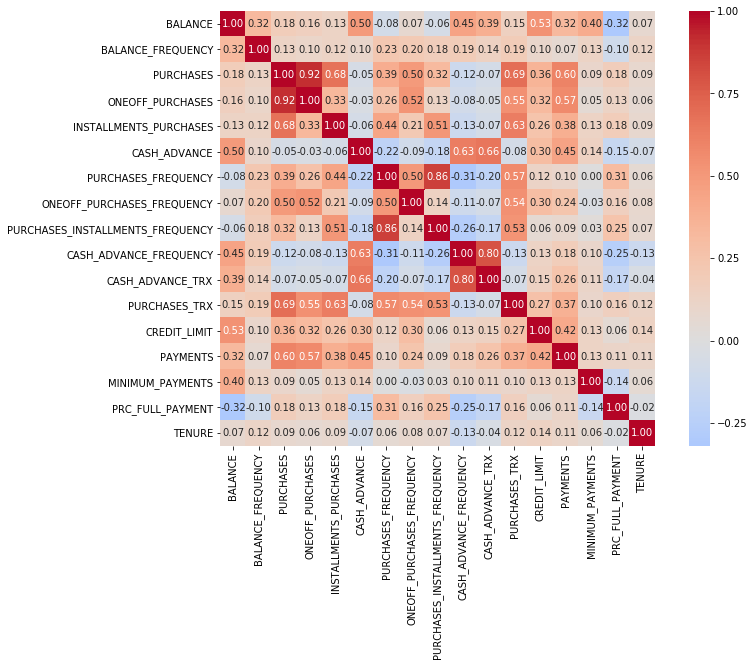

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(ccinfo.corr(),
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            annot=True,
            square=True,
            ax=ax);

ax.set_ylim(bottom=17, top=0); # for some reason the y axis gets truncated in the plot, this fixes it

**Conclusions from EDA**

Customers vary based on the types of products/service they use, how frequently they use them, and the amount they spend on them. They also vary in their payment habits.

This is a customer segmentation problem, and a clustering approach is likely to be helpful in identifying different types of users. There are strong collinearities between the features and these will need to be removed before doing the clustering.

### 4. Data cleaning and preprocessing

In [14]:
# drop single row with null in CREDIT_LIMIT
ccinfo = ccinfo.dropna(subset=['CREDIT_LIMIT'])

# set customer id as index
ccinfo.set_index('CUST_ID', inplace=True)

# drop TENURE column
ccinfo = ccinfo.drop(columns='TENURE')

# for now drop rows with null in MINIMUM_PAYMENTS
ccinfo = ccinfo.dropna(subset=['MINIMUM_PAYMENTS'])

#### 4.1 Scale the data

The data will need to be scaled because different features are on different scales (frequency, dollars, months). However, several of the features have outliers. There are a few ways to deal with this. One way would be to use robust scaling because it is not as sensitive to outliers as standard scaling. Another way would be to log normalize the features that have outliers and then use standard scaling. I will take this second approach because the log transforms will also help to unskew the data.

In [15]:
# select features that have outliers (these are all the columns that have dollar amount units)
columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
           'CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

# add one (so zeros are not problem), and apply log transform
transformed = np.log10(ccinfo[columns] + 1)
ccinfo[columns] = transformed

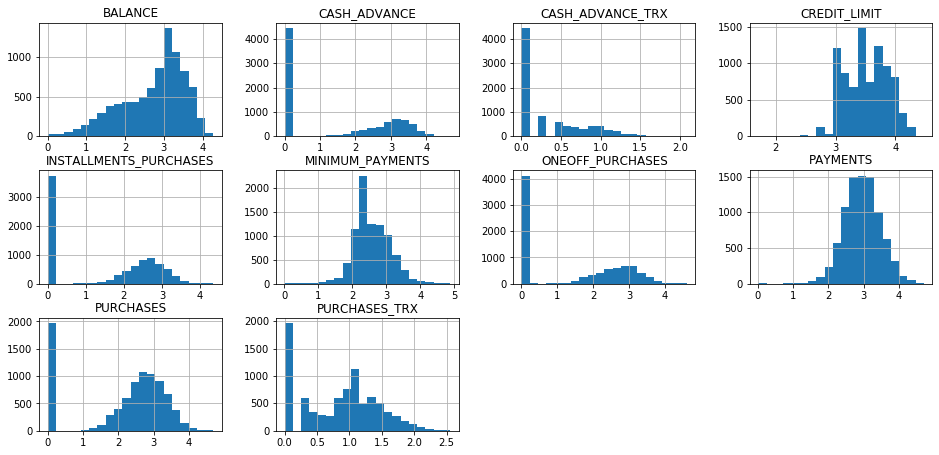

In [16]:
# sanity check
ccinfo.hist(column=columns, bins=20, layout=(3,4), figsize=(16,7.5));

Much better. Now standardize.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# apply standard scaling

scaler = StandardScaler()

ccinfo_scaled = pd.DataFrame(scaler.fit_transform(ccinfo), columns=ccinfo.columns)

In [19]:
# inspect summary stats
ccinfo_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-5.356447e-16,-5.694740e-15,1.298444e-15,5.589888e-15,-3.942089e-16,-5.132660e-16,-2.187085e-16,-8.273836e-15,-2.427835e-15,1.809023e-15,1.268272e-15,2.328910e-15,-8.039218e-15,1.588971e-16,6.919482e-16,-3.689589e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-3.304937e+00,-4.309583e+00,-1.686451e+00,-9.960241e-01,-1.096108e+00,-9.378945e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-8.170000e-01,-1.390107e+00,-5.068439e+00,-5.833613e+00,-4.960999e+00,-5.377269e-01
25%,-6.652098e-01,6.767893e-02,-3.888245e-01,-9.960241e-01,-1.096108e+00,-9.378945e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-8.170000e-01,-8.873263e-01,-8.770442e-01,-6.687364e-01,-6.603404e-01,-5.377269e-01
50%,2.934284e-01,5.054046e-01,3.427578e-01,1.811055e-01,3.799054e-01,-9.378945e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-8.170000e-01,1.182355e-01,-1.129413e-01,-1.300177e-02,-1.469893e-01,-5.377269e-01
75%,7.315375e-01,5.054046e-01,7.239948e-01,9.708421e-01,9.047958e-01,1.031623e+00,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,7.685163e-01,7.456696e-01,8.271247e-01,6.567593e-01,6.677582e-01,2.485496e-02
max,1.892943e+00,5.054046e-01,2.008964e+00,2.267846e+00,2.146165e+00,2.075580e+00,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,3.931636e+00,2.877417e+00,2.686891e+00,3.465076e+00,4.471659e+00,2.837758e+00


All the features are now on the same scale, and the means and SDs are 0 and 1 (compare with summary stats in section 3 above where means and sds varied across the features by orders of magnitude).

#### 4.2 Take care of 313 nulls in MINIMUM_PAYMENTS column

#### *Note: this is still in progress*

*To do: determine if the missing values are missing at random (MAR) or missing not at random (MCAR). If random then dropping rows will be fine, if not random then will have to impute.*

In [ ]:
# # have a look
# tmp = ccinfo[ccinfo.MINIMUM_PAYMENTS.isnull()]
# tmp.head()

In [ ]:
# # get summary stats
# tmp.describe()

In [ ]:
# # can I use monthly average balance to impute minimum payments?
# fig, ax = plt.subplots()
# plt.scatter(x=ccinfo.MINIMUM_PAYMENTS, y=ccinfo.BALANCE, marker='.');
# ax.set_xlabel('MINIMUM_PAYMENTS')
# ax.set_ylabel('BALANCE')
# ax.set_xlim(left = -200, right=9200);
# ax.grid()

#### 4.3 Remove collinearities

As seen in the EDA, there are multiple collinearities in the data, some quite strong. These need to be removed in order to avoid the situation that multiple highly correlated variables have an increased influence in cluster formation. I will do this by reducing the dimensions with principal component analysis.

In [20]:
from sklearn.decomposition import PCA

pca = PCA();

pca.fit(ccinfo_scaled);

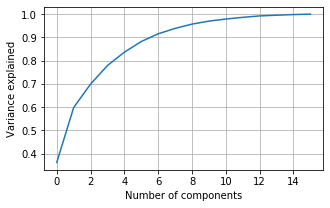

In [21]:
# scree plot

fig, ax = plt.subplots(figsize=(5,3))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

ax.set_xlabel('Number of components')
ax.set_ylabel('Variance explained')
ax.grid()

It looks like ~95% of the variance can be explained with the first 8 principal components, so I will only use those.

In [22]:
# apply pca transformation
principal_components = pca.transform(ccinfo_scaled)

# put first 6 principal components into a dataframe
ccinfo_transformed = pd.DataFrame(data = principal_components[:,0:8],
                                  columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

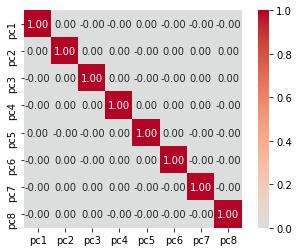

In [23]:
# double check that the collinearities have been removed

fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(ccinfo_transformed.corr(),
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            annot=True,
            square=True,
            ax=ax);

ax.set_ylim(bottom=8, top=0); # for some reason the y axis gets truncated in the plot, this fixes it

### 5. KMeans clustering

Two popular clustering algorithms are kmeans and hierarchical. I don't expect the clusters in this dataset to be hierarchical so I will use kmeans.

In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#### 5.1 Determine optimal number of clusters

In [25]:
# elbow method

inertia = [] # sum of squared distances
#distortions = []

for i in range(1, 11):
    
    kmeans = KMeans(n_clusters=i, random_state=1).fit(ccinfo_transformed)
    kmeans.fit(ccinfo_transformed)
    
#     distortions.append(sum(np.min(cdist(ccinfo_transformed, kmeans.cluster_centers_, 
#                                         'euclidean'),axis=1)) / ccinfo_transformed.shape[0]) 
    inertia.append(kmeans.inertia_)

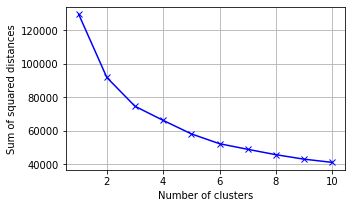

In [26]:
fig, ax1 = plt.subplots(figsize=(5,3))

ax1.plot(range(1, 11), inertia, 'bx-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distances')
ax1.grid()

No easily identifiable elbow. Try average silhouette method.

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
# get average silhouette score for each number of clusters

silhouette_avg = []

for i in range(2,11):
    cluster_labels = KMeans(n_clusters=i, random_state=10).fit_predict(ccinfo_transformed)
    score = silhouette_score(ccinfo_transformed, cluster_labels)
    silhouette_avg.append(score)

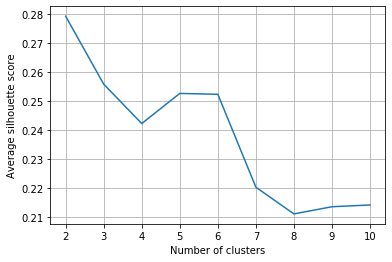

In [30]:
fig, ax = plt.subplots()

plt.plot(range(2,11), silhouette_avg)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average silhouette score')
ax.grid()

Also not very helpful.

Because it is not clear what the optimal cluster number is, I will try a few models with different numbers of clusters (2-5).

#### 5.2 Model and visualize results

In [31]:
kmeans2 = KMeans(n_clusters=2, random_state=1).fit(ccinfo_transformed)
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(ccinfo_transformed)
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(ccinfo_transformed)
kmeans5 = KMeans(n_clusters=5, random_state=1).fit(ccinfo_transformed)

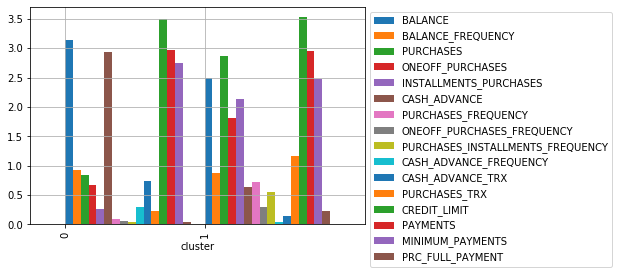

In [32]:
ccinfo['cluster'] = kmeans2.labels_

fig, ax = plt.subplots(figsize=(6,4))
ccinfo.groupby('cluster').mean().plot(kind='bar', width=0.9, align='edge', ax=ax);
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.grid()

The main distinctions here are between the people who make purchases (cluster 1) and the people who get cash advances (cluster 0).

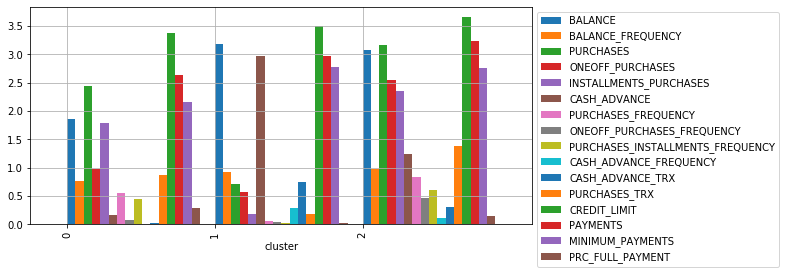

In [33]:
ccinfo['cluster'] = kmeans3.labels_

fig, ax = plt.subplots(figsize=(9,4))
ccinfo.groupby('cluster').mean().plot(kind='bar', width=0.9, align='edge', ax=ax);
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.grid()

Here we can see that in addition to the purchase and cash advance groups, there is an additional group that makes purchases AND gets cash advances (cluster 2).

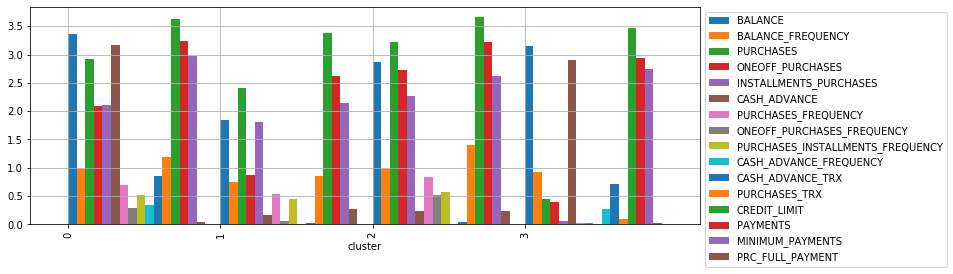

In [34]:
ccinfo['cluster'] = kmeans4.labels_

fig, ax = plt.subplots(figsize=(12,4))
ccinfo.groupby('cluster').mean().plot(kind='bar', width=0.9, align='edge', ax=ax);
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.grid()

Now we have a split for the purchase groups: cluster 2 makes more purchases and has a higher balance compared to cluster 1. Cluster 2 also makes more one-off purchases than cluster 1.

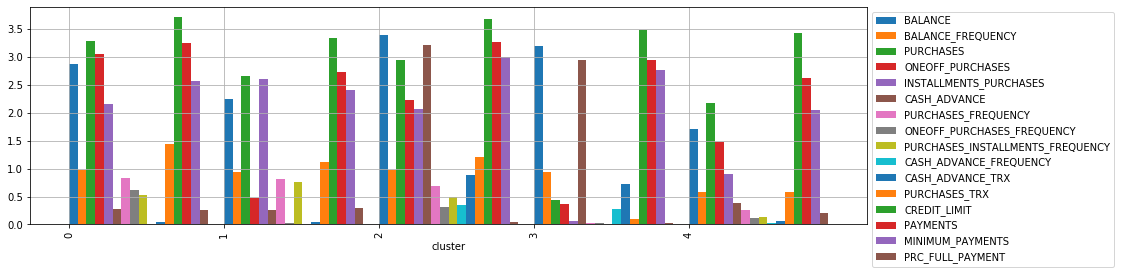

In [35]:
ccinfo['cluster'] = kmeans5.labels_

fig, ax = plt.subplots(figsize=(15,4))
ccinfo.groupby('cluster').mean().plot(kind='bar', width=0.9, align='edge', ax=ax);
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.grid()

In [ ]:
# note to self: include info on the numbers of customers in each cluster

With 5 clusters the differences are more subtle and it gets a little harder to see them. For now I will provide my conclusions and suggestions based on using 4 clusters.

### 6. Feedback to the company

Overall there are 3 main different types of customers: 

1) Customers that don't make purchases and only use the card for cash advances.

2) Customers that make purchases and also use the card for cash advances.

3) Customers that only make purchases and do not use the card for cash advances.

The latter group can be further subdivided into two groups, one of which makes more purchases (especially one-off purchases) and has higher balances than the other group.

Since ~75% of customers use the card to make purchases, I would recommend that to reduce the cost of signup incentives they drop incentives related to cash advances. Further, if they could figure out how to identify individuals that are only interested in cash advances, they could then target that subgroup with specific incentives related to cash advances and not related to purchases.
